<a href="https://colab.research.google.com/github/sasansharee/Sasan_MMA_Assisgnments/blob/main/ML_Preprocess_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Import the boston house dataset from sklearn.datasets**

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv('/content/boston_house_prices.csv')

In [ ]:
df.info()

In [ ]:
df.describe()

In [36]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']

In [37]:
X.shape, y.shape

((506, 13), (506,))

In [ ]:
np.unique(y, return_counts=True)

In [ ]:
df.groupby('MEDV').size()

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [40]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((379, 13), (127, 13), (379,), (127,))

In [ ]:
len(X_train) / len(X), len(X_test) / len(X), len(y_train) / len(y), len(y_test) / len(y)

**Step 2: Create a scatter plot of each attribute with the mean house price**

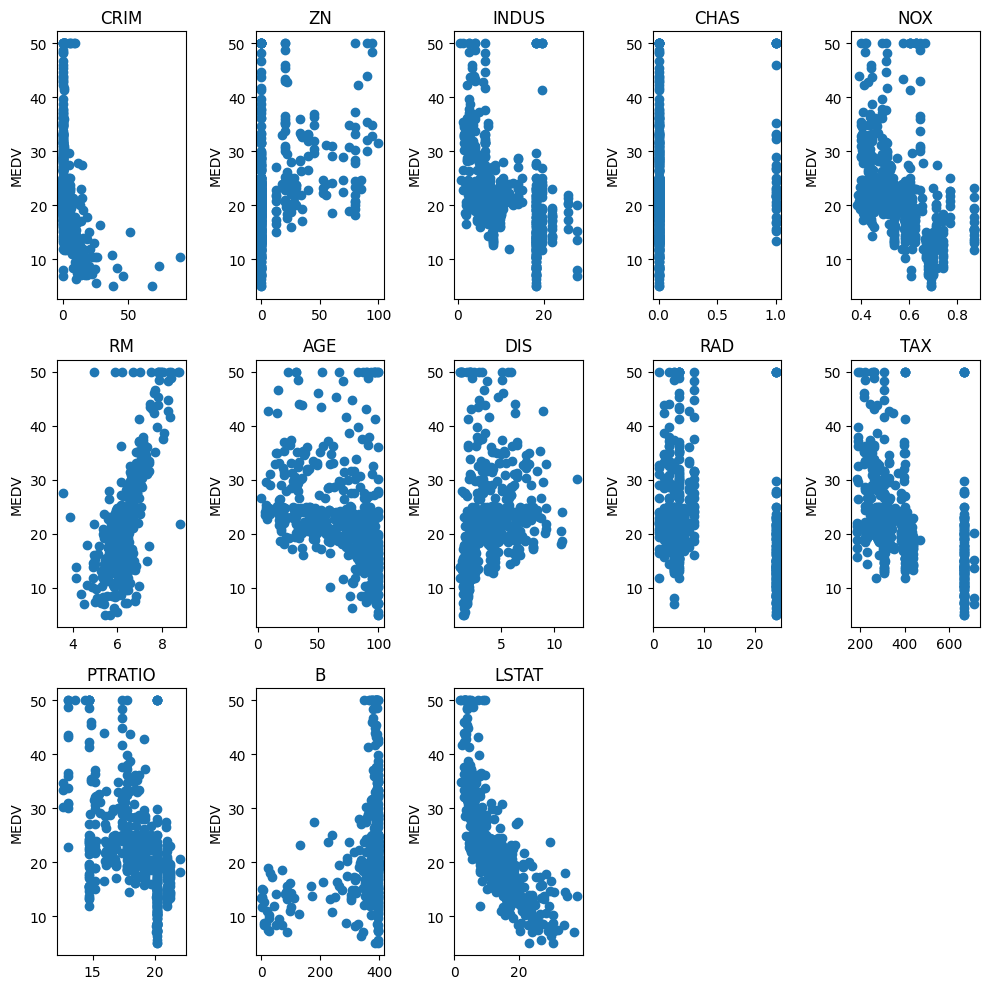

In [52]:
fix, axes = plt.subplots(3, 5, figsize = (10, 10))
for i, ax in enumerate(axes.ravel()):
  if i > 12:
    ax.set_visible(False)
    continue
  ax.scatter(X.loc[:, X.columns[i]], y)
  ax.set_title(X.columns[i])
  ax.set_ylabel('MEDV')

plt.tight_layout()
plt.show()

**Step 3: Create a box plot of all attributes**

In [ ]:
plt.boxplot(X)
plt.xticks(np.arange(1, 14), X.columns, rotation=90)
plt.show()

**Step 4: Use StandardScaler() to scale the training data set**

In [72]:
from sklearn.preprocessing import StandardScaler
scaler_1 = StandardScaler()
X_train_sc = scaler_1.fit_transform(X_train)
X_test_sc = scaler_1.transform(X_test)

**Step 5:
Use KNeighborsRegressor() to fit both not-scaled and scaled datasets. Check the scores of test dataset for both models**

In [85]:
from sklearn.neighbors import KNeighborsRegressor
knn_1 = KNeighborsRegressor()
knn_1.fit(X_train, y_train)

KNeighborsRegressor()

In [86]:
knn_1.score(X_test, y_test)

0.5713425641710351

In [87]:
knn_2 = KNeighborsRegressor()
knn_2.fit(X_train_sc, y_train)

KNeighborsRegressor()

In [88]:
knn_2.score(X_test_sc, y_test)

0.7474628481186463

**Step 6:
Repeat Step 5 for RandomForestRegressor**

In [89]:
from sklearn.ensemble import RandomForestRegressor
rf_1 = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf_1.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [90]:
rf_1.score(X_test, y_test)

0.8189791994347763

In [91]:
rf_2 = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf_2.fit(X_train_sc, y_train)

RandomForestRegressor(random_state=0)

In [92]:
rf_2.score(X_test_sc, y_test)

0.8189718923021231